## Reporting: wragle_report
* Create a **300-600 word written report** called "wrangle_report.pdf" or "wrangle_report.html" that briefly describes your wrangling efforts. This is to be framed as an internal document.

1 - gathering data
    1.1 - i download the image predictions TSV file using requests.get() method with provided url then checked the status code of the requests to confirm its success
    1.2 -Parsing TSV File: The downloaded TSV file was then parsed as a CSV using the appropriate delimiter (likely / as mentioned, though this is unusual for TSV) and loaded into a pandas DataFrame named "img_predictions."
    1.3 Reading Twitter Data: Twitter archive and tweet JSON files were read using appropriate pandas methods.

2- assessing data
2.1 Data Inspection: Basic pandas methods like info(), isna(), duplicated(), and sample() were used for initial visual insight into the data.
2.2 Identified Issues:
2.2.1 Twitter Archive Dataset: This dataset has many columns with missing or irrelevant values that will be deleted.
2.2.2 Twitter Archive Dataset (Rating Numerator/Denominator): These columns can be combined by dividing them to improve readability and ease of analysis.
2.2.3 Image Prediction Dataset: This dataset contains detailed information (3.11) stating the top 3 machine learning predictions, even if they aren't dog breeds.
2.2.4 Tweet Dataset: This dataset is noted to have a lot of missing data.
2.2.5 Combining Dog Stage Columns: In the tw_archive dataset, the columns "doggo", "floofer", "pupper", and "puppo" can be combined into a single column representing the "dog stage" for easier analysis and improved readability.

3-cleaning data:

3.1 Merging Image Prediction Columns: The columns 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', and 'p3_dog' from the "img_predictions" dataset are merged into one column. This is done using the loc[] method in pandas to keep only the highest confidence prediction relevant to the analysis. The example code img_predictions.loc[img_predictions['p1_dog'] == True, 'prediction'] = img_predictions['p1'], and similar lines for 'p2_dog' and 'p3_dog', illustrate this.
3.2 Dropping Columns with Missing Data: Columns containing a significant amount of missing or unneeded data are dropped using the pandas.drop() method.
3.3 Keeping Relevant Columns in Tweet Data: Since most columns in the tweet_df are unnecessary, a list of desired columns is created to retain only the essential information from the dataframe.3.4 Renaming and Merging Datasets:

The "tweet id" column in the tweet_df was found to be simply named "id," which could cause confusion. It was crucial to address this as it is the sole common column for merging the three datasets.
All three datasets were then merged into a single dataset named "twitter_archive_master" using the pandas.merge() method.
3.5 Deleting Rows with Missing Dog Predictions: All rows where the dog prediction was missing were deleted because this information was crucial for the analysis.
3.6 Changing 'tweet_id' Data Type: The 'tweet_id' column was changed to an object data type. The rationale given is that an object type is more fitting because one cannot perform meaningful mathematical operations on tweet IDs to get significant numerical results, unlike with numerical values.
3.7 Combining Rating Numerator and Denominator: The rating numerator and denominator columns were combined by dividing them. The resulting quotient, representing the rating, was then stored in a new column named "rating."
3.8 Combining Dog Stage Columns: The columns "doggo", "floofer", "pupper", and "puppo" in the tw_archive dataset were combined into a single new column called "dog_stages." This was achieved using the pandas.bfill() method to retrieve the first non-null value from the left, followed by the pandas.iloc[] method for storage.

3.9 Removing Retweets: Retweets were removed by deleting all rows where the text in the "text" column started with "@". This involved checking each column that began with "@" and then using the "!" (negate) sign to flip the output, ensuring only rows where the "text" column does not start with "@" (i.e., not retweets) were kept.

3.10 Handling 'timestamp' and 'created_at' Columns: The two columns, "timestamp" and "created_at," were found to hold the same data. However, the "timestamp" column was of object datatype, while "created_at" was datetime64[ns, UTC]. To maintain a consistent and appropriate data type, the "timestamp" column was deleted, and "created_at" was kept.

"what dog breed has the most tweets?
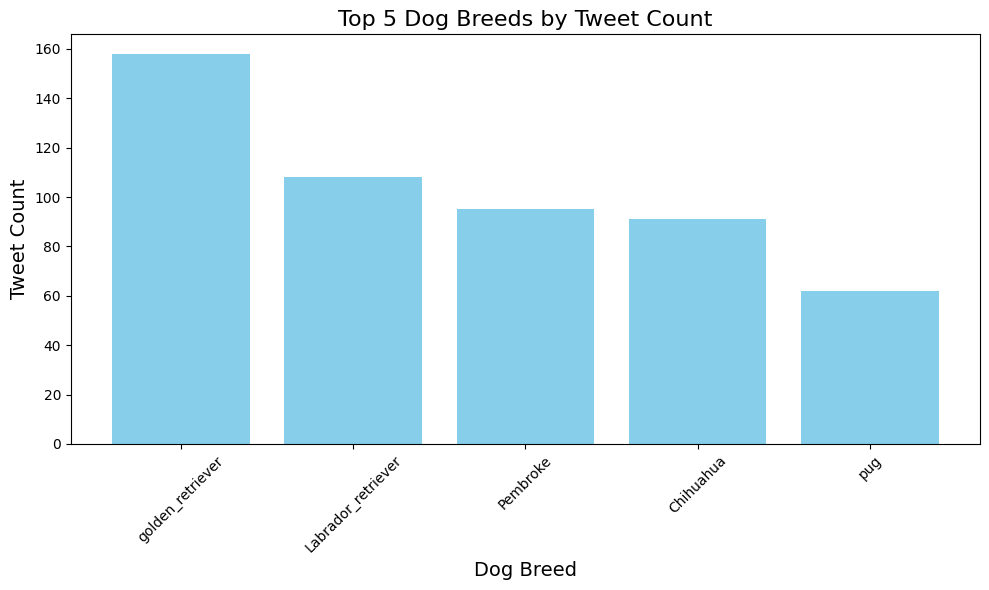